In [8]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from datetime import date
from datetime import datetime
from sklearn.linear_model import LinearRegression
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

df_result = pd.read_csv( "./results_excel.csv", sep=';')
df_polls = pd.read_csv("./presidential_polls.csv")
df_result


,State,name,percentage,Result
0,Alabama,Trump,"0,62","62,00"
1,Alabama,Clinton,"0,34","34,00"
2,Alaska,Trump,"0,51","51,00"
3,Alaska,Clinton,"0,37","37,00"
4,Arizona,Trump,"0,49","49,00"
...,...,...,...,...
95,West Virginia,Clinton,"0,26","26,00"
96,Wisconsin,Trump,"0,47","47,00"
97,Wisconsin,Clinton,"0,46","46,00"
98,Wyoming,Trump,"0,68","68,00"


In [9]:
def datetime_converter(date):
    date_time_obj = datetime.strptime(date, '%m/%d/%y')
    return date_time_obj
    
df_polls["datetimeformatted"] = df_polls["createddate"].apply(lambda x: datetime_converter(x))

In [10]:
df_polls[(df_polls.pollster == "Google Consumer Surveys") & (df_polls.question_id == 75001)]

,cycle,branch,type,matchup,forecastdate,state,startdate,enddate,pollster,grade,...,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,multiversions,url,poll_id,question_id,createddate,timestamp,datetimeformatted
365,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/1/16,Alabama,10/25/2016,10/31/2016,Google Consumer Surveys,B,...,61.86457,3.285099,NaN,NaN,https://datastudio.google.com/u/0/#/org//repor...,47942,75001,11/1/16,15:09:38 1 Nov 2016,2016-11-01
3743,2016,President,now-cast,Clinton vs. Trump vs. Johnson,11/1/16,Alabama,10/25/2016,10/31/2016,Google Consumer Surveys,B,...,61.83737,3.297949,NaN,NaN,https://datastudio.google.com/u/0/#/org//repor...,47942,75001,11/1/16,15:03:47 1 Nov 2016,2016-11-01
7190,2016,President,polls-only,Clinton vs. Trump vs. Johnson,11/1/16,Alabama,10/25/2016,10/31/2016,Google Consumer Surveys,B,...,61.82890,3.269269,NaN,NaN,https://datastudio.google.com/u/0/#/org//repor...,47942,75001,11/1/16,14:57:58 1 Nov 2016,2016-11-01


In [11]:
list_cli= df_result["Result"][df_result["name"] == "Clinton"]
list_cli.reset_index(drop=True)
list_Trump= df_result["Result"][df_result["name"] == "Trump"]
list_Trump.reset_index(drop=True)
list_state = df_result.State[::2]
list_state.reset_index(drop=True)


0                  Alabama
1                   Alaska
2                  Arizona
3                 Arkansas
4               California
5                 Colorado
6              Connecticut
7                 Delaware
8     District of Columbia
9                  Florida
10                 Georgia
11                  Hawaii
12                   Idaho
13                Illinois
14                 Indiana
15                    Iowa
16                  Kansas
17                Kentucky
18               Louisiana
19                   Maine
20                Maryland
21           Massachusetts
22                Michigan
23               Minnesota
24             Mississippi
25                Missouri
26                 Montana
27                Nebraska
28                  Nevada
29           New Hampshire
30              New Jersey
31              New Mexico
32                New York
33          North Carolina
34            North Dakota
35                    Ohio
36                Oklahoma
3

In [12]:
df_adjusted = pd.DataFrame({"State": list_state.reset_index(drop=True), "Trump": list_Trump.reset_index(drop=True), "Clinton": list_cli.reset_index(drop=True)} )
df_adjusted.to_csv("./adjusted.csv")
df_adjusted

,State,Trump,Clinton
0,Alabama,"62,00","34,00"
1,Alaska,"51,00","37,00"
2,Arizona,"49,00","45,00"
3,Arkansas,"61,00","34,00"
4,California,"32,00","62,00"
5,Colorado,"43,00","48,00"
6,Connecticut,"41,00","55,00"
7,Delaware,"42,00","53,00"
8,District of Columbia,"4,00","91,00"
9,Florida,"49,00","48,00"


In [13]:
df_polls.groupby("type").size()

type
now-cast      3412
polls-only    3412
polls-plus    3412
dtype: int64

In [14]:
df_polls_only = df_polls[df_polls.type == "polls-only"]
df_polls_only

,cycle,branch,type,matchup,forecastdate,state,startdate,enddate,pollster,grade,...,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,multiversions,url,poll_id,question_id,createddate,timestamp,datetimeformatted
6824,2016,President,polls-only,Clinton vs. Trump vs. Johnson,11/1/16,U.S.,10/27/2016,10/30/2016,ABC News/Washington Post,A+,...,44.84533,3.364997,NaN,NaN,http://www.langerresearch.com/wp-content/uploa...,47881,74936,11/1/16,14:57:58 1 Nov 2016,2016-11-01
6825,2016,President,polls-only,Clinton vs. Trump vs. Johnson,11/1/16,Virginia,10/27/2016,10/30/2016,ABC News/Washington Post,A+,...,40.84145,6.364997,NaN,NaN,https://www.washingtonpost.com/local/virginia-...,47880,74934,11/1/16,14:57:58 1 Nov 2016,2016-11-01
6826,2016,President,polls-only,Clinton vs. Trump vs. Johnson,11/1/16,U.S.,10/25/2016,10/31/2016,Google Consumer Surveys,B,...,40.83036,5.659269,NaN,NaN,https://datastudio.google.com/u/0/#/org//repor...,47940,74999,11/1/16,14:57:58 1 Nov 2016,2016-11-01
6827,2016,President,polls-only,Clinton vs. Trump vs. Johnson,11/1/16,Florida,10/20/2016,10/24/2016,SurveyUSA,A,...,45.27989,1.798073,NaN,NaN,http://www.baynews9.com/content/news/baynews9/...,47465,74252,10/25/16,14:57:58 1 Nov 2016,2016-10-25
6828,2016,President,polls-only,Clinton vs. Trump vs. Johnson,11/1/16,U.S.,10/20/2016,10/25/2016,Pew Research Center,B+,...,42.09140,3.586243,NaN,NaN,http://www.people-press.org/2016/10/27/as-elec...,47616,74519,10/27/16,14:57:58 1 Nov 2016,2016-10-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10231,2016,President,polls-only,Clinton vs. Trump vs. Johnson,11/1/16,Alabama,9/30/2016,10/13/2016,Ipsos,A-,...,54.76821,NaN,NaN,NaN,http://reuters.com/statesofthenation/,46817,73263,10/15/16,14:57:58 1 Nov 2016,2016-10-15
10232,2016,President,polls-only,Clinton vs. Trump vs. Johnson,11/1/16,Virginia,9/30/2016,10/6/2016,Ipsos,A-,...,39.41588,NaN,NaN,NaN,http://www.reuters.com/statesofthenation/,46675,72969,10/10/16,14:57:58 1 Nov 2016,2016-10-10
10233,2016,President,polls-only,Clinton vs. Trump vs. Johnson,11/1/16,Virginia,9/16/2016,9/22/2016,Ipsos,A-,...,39.97518,NaN,NaN,NaN,http://www.reuters.com/statesofthenation/,46096,72088,9/26/16,14:57:58 1 Nov 2016,2016-09-26
10234,2016,President,polls-only,Clinton vs. Trump vs. Johnson,11/1/16,North Carolina,6/20/2016,6/21/2016,Public Policy Polling,B+,...,46.66175,1.596946,NaN,NaN,http://www.publicpolicypolling.com/pdf/2015/PP...,44400,67363,6/23/16,14:57:58 1 Nov 2016,2016-06-23


In [15]:
df_polls_only.grade.fillna("non-graded", inplace= True)


/Users/hamdisevketbeyoglu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [16]:
df_polls_only.groupby("grade").size()

grade
A             144
A+             72
A-            932
B             874
B+            184
B-            109
C              46
C+            282
C-            382
D               9
non-graded    378
dtype: int64

In [17]:
df_polls_only.groupby("population").size()

population
a       19
lv    2960
rv     391
v       42
dtype: int64

In [18]:
df_polls_lv = df_polls_only[df_polls_only.population == "lv"]

In [19]:
sb.set(rc={'figure.figsize':(14,10)})
plt.figure(figsize=(15,10))

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

In [20]:
plt.figure(figsize=(15,10))
pollster = df_polls_only.groupby(["pollster", "grade"])
pollster.size().sort_values(ascending = False)

pollster                                                 grade     
Ipsos                                                    A-            791
Google Consumer Surveys                                  B             690
SurveyMonkey                                             C-            353
USC Dornsife/LA Times                                    non-graded    114
CVOTER International                                     C+            109
                                                                      ... 
Ogden & Fry                                              non-graded      1
North Star Opinion Research/Ayres, McHenry & Associates  B-              1
Nielson Brothers Polling                                 C-              1
National Journal                                         A               1
Orion Strategies                                         B-              1
Length: 188, dtype: int64

<Figure size 1080x720 with 0 Axes>

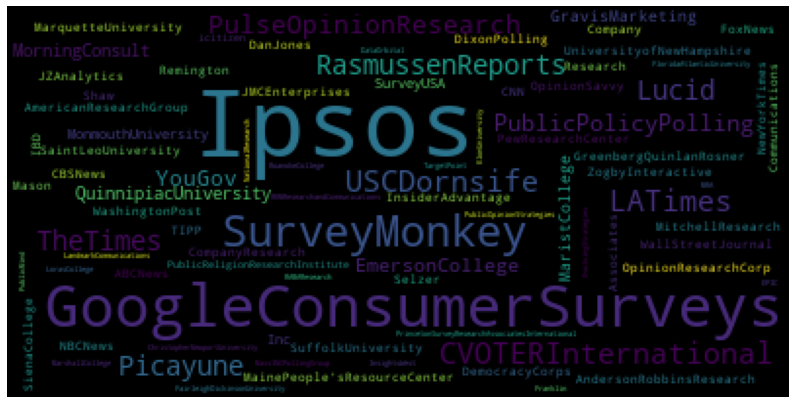

In [21]:


text = ''
for val in df_polls_only.pollster:
    with_out_space = ''
    words  = val.split(' ')
    for i in words:
        
        with_out_space += i
    text += with_out_space + " "
        


wordcloud = WordCloud(collocations=False ).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


In [22]:
df_without_us = df_polls_lv[df_polls_lv.state != "U.S."]



/Users/hamdisevketbeyoglu/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1242: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


IndexError: index 0 is out of bounds for axis 0 with size 0

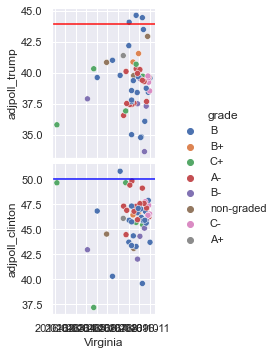

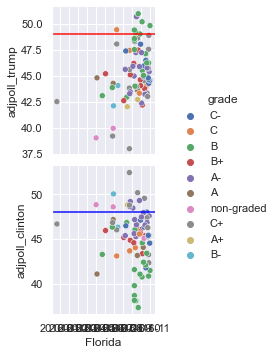

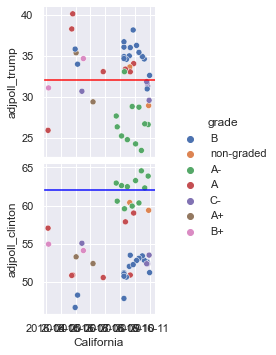

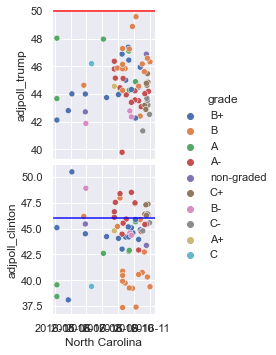

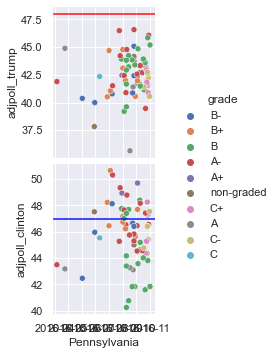

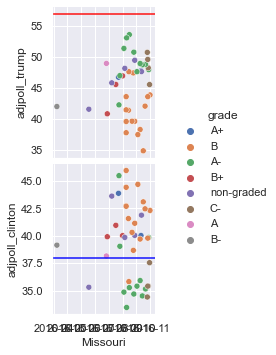

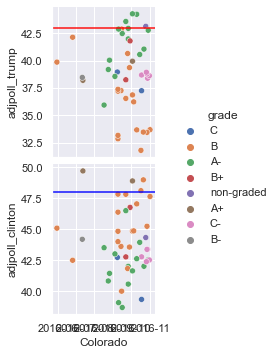

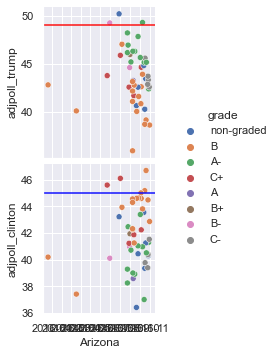

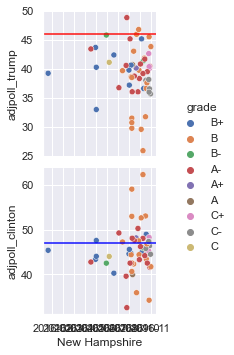

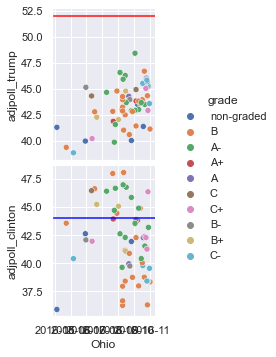

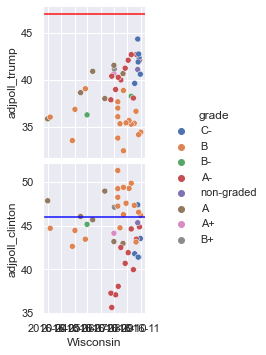

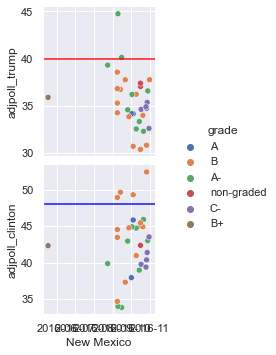

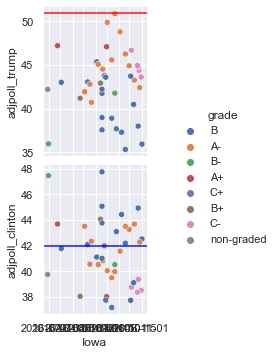

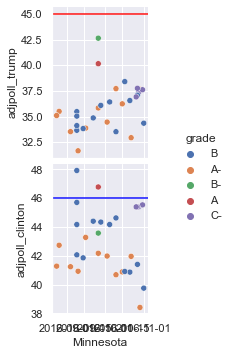

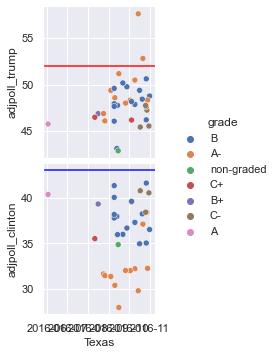

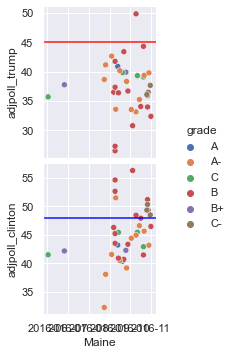

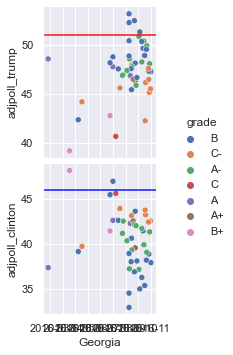

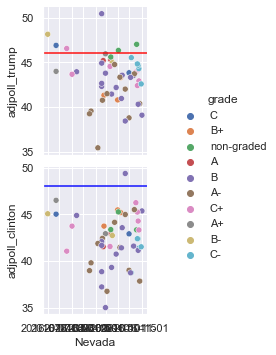

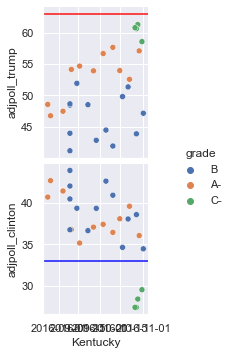

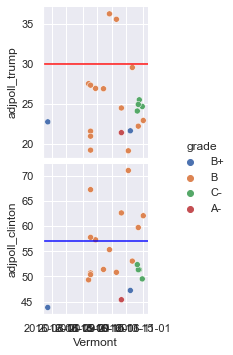

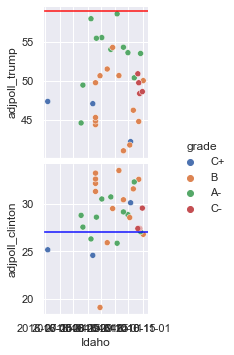

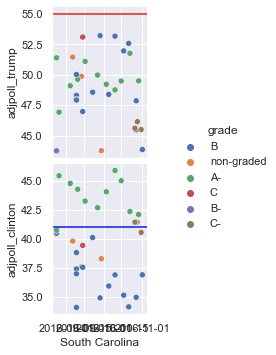

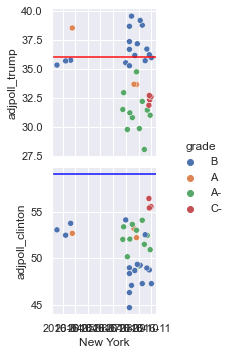

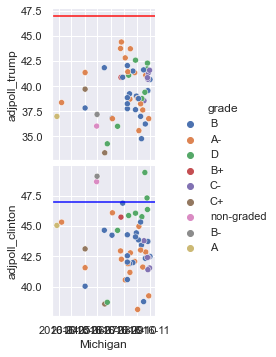

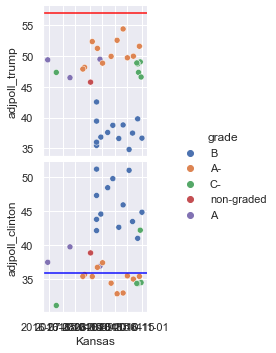

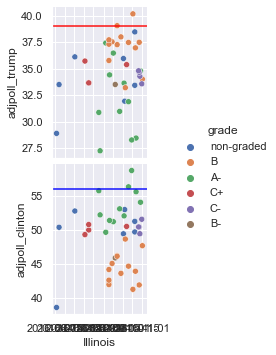

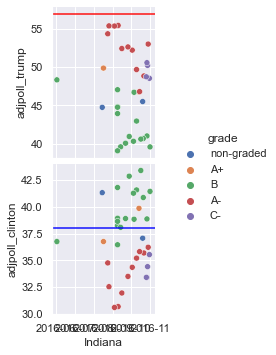

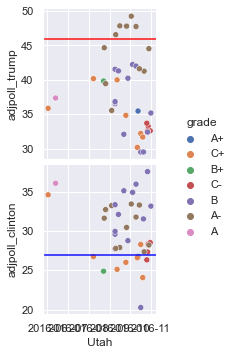

In [23]:
for i in df_without_us.state.unique():
    trump = int(df_adjusted["Trump"][df_adjusted.State == i].values[0].split(',')[0])
    clinton = int(df_adjusted["Clinton"][df_adjusted.State == i].values[0].split(',')[0])
    df_polls_wt = df_polls_lv[(df_polls_lv.poll_wt < 1) & (df_polls_lv.state == i )]
    g = sb.pairplot(data=df_polls_wt, y_vars = ["adjpoll_trump", "adjpoll_clinton"] , x_vars= "datetimeformatted", hue="grade").set(xlabel= i)
    g.axes[0][0].axhline(y = trump, color='red', linewidth=2, alpha=.7)
    g.axes[1][0].axhline(y = clinton, color='blue', linewidth=2, alpha=.7)
plt.show

In [24]:
df_result[df_result.State == "Alabama"].values[0][1]

'Trump'

In [25]:
def winner (x):
    if int(df_result[df_result.State == x].values[0][3].split(",")[0]) > int(df_result[df_result.State == x].values[1][3].split(",")[0]):
        return df_result[df_result.State == x].values[0][1]
    else:
        return df_result[df_result.State == x].values[1][1]

In [26]:
def winner_a (x):
    if int(df_pools_A_min[df_pools_A_min[0] == x].values[0][8].split(",")[0]) > int(df_pools_A_min[df_pools_A_min[0] == x].values[1][9].split(",")[0]):
        return "Clinton"
    else:
        return "Trump"

In [28]:
df_result["winner"] = df_result.State.apply(lambda x: winner(x))
df_result.to_csv("./winner_result_new.csv")
